In [1]:
import mne
from mne.viz import circular_layout
from mne_connectivity.viz import plot_connectivity_circle
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ordered_list = ['frontalpole-rh', 'frontalpole-lh', 'rostralmiddlefrontal-rh', 'rostralmiddlefrontal-lh', 'parsorbitalis-rh', 'parsorbitalis-lh', 'medialorbitofrontal-rh', 'medialorbitofrontal-lh', 'rostralanteriorcingulate-rh', 'rostralanteriorcingulate-lh', 'parstriangularis-rh', 'parstriangularis-lh', 'lateralorbitofrontal-rh', 'lateralorbitofrontal-lh', 'superiorfrontal-rh', 'superiorfrontal-lh', 'caudalanteriorcingulate-rh', 'caudalanteriorcingulate-lh', 'parsopercularis-rh', 'parsopercularis-lh', 'caudalmiddlefrontal-rh', 'caudalmiddlefrontal-lh', 'temporalpole-rh', 'temporalpole-lh', 'insula-rh', 'insula-lh', 'entorhinal-rh', 'entorhinal-lh', 'precentral-rh', 'precentral-lh', 'posteriorcingulate-rh', 'posteriorcingulate-lh', 'superiortemporal-rh', 'superiortemporal-lh', 'postcentral-rh', 'postcentral-lh', 'transversetemporal-rh', 'transversetemporal-lh', 'paracentral-rh', 'paracentral-lh', 'middletemporal-rh', 'middletemporal-lh', 'parahippocampal-rh', 'parahippocampal-lh', 'inferiortemporal-rh', 'inferiortemporal-lh', 'supramarginal-rh', 'supramarginal-lh', 'fusiform-rh', 'fusiform-lh', 'bankssts-rh', 'bankssts-lh', 'isthmuscingulate-rh', 'isthmuscingulate-lh', 'precuneus-rh', 'precuneus-lh', 'superiorparietal-rh', 'superiorparietal-lh', 'inferiorparietal-rh', 'inferiorparietal-lh', 'lingual-rh', 'lingual-lh', 'cuneus-rh', 'cuneus-lh', 'pericalcarine-rh', 'pericalcarine-lh', 'lateraloccipital-rh', 'lateraloccipital-lh']

In [3]:
labels = mne.read_labels_from_annot('fsaverage', parc='aparc',subjects_dir='/Applications/freesurfer/7.4.1/subjects/')

fs_label_names = [label.name for label in labels]
fs_label_names.remove('unknown-lh')
lh_labels = [label for label in fs_label_names if label.endswith('lh')]

# Get the y-location of the label
label_ypos = list()
for name in lh_labels:
    idx = fs_label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos.append(ypos)

# Reorder the labels based on their location
lh_labels = [label for (yp, label) in sorted(zip(label_ypos, lh_labels))]

# For the right hemi
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

# Save the plot order and create a circular layout
node_order = list()
node_order.extend(lh_labels[::-1])  # reverse the order
node_order.extend(rh_labels)

#
node_angles = circular_layout(ordered_list, node_order, start_pos=90, group_boundaries=[0, len(fs_label_names) / 2])

Reading labels from parcellation...
   read 35 labels from /Applications/freesurfer/7.4.1/subjects/fsaverage/label/lh.aparc.annot
   read 34 labels from /Applications/freesurfer/7.4.1/subjects/fsaverage/label/rh.aparc.annot


In [4]:
"""empty_list = []
for name in ordered_list:
    empty_list.append("")"""

In [ ]:
#conn circle eo and ec

In [9]:
weighted = means/std

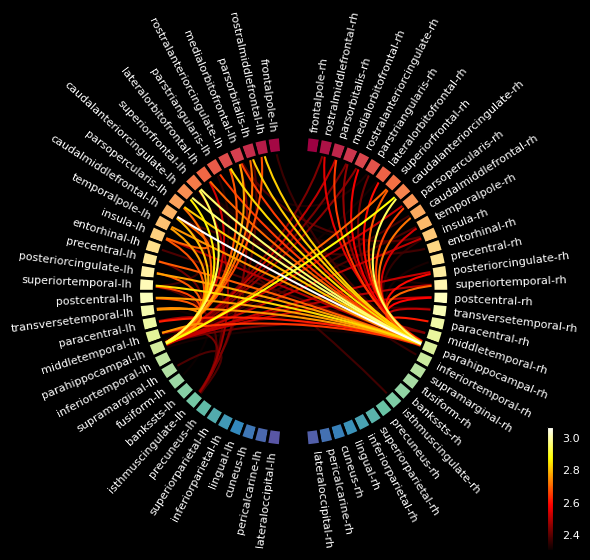

(<Figure size 800x800 with 2 Axes>, <PolarAxes: >)

In [39]:
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black', subplot_kw=dict(polar=True))

means = pd.read_csv(f'/Users/lina_01/Desktop/mpi_lemon/dynsys_EC_mean_df.csv')
std = pd.read_csv(f'/Users/lina_01/Desktop/mpi_lemon/dynsys_EC_std_df.csv')
weighted = means/std
#weighted_z_score = (np.array(weighted) - np.array(weighted).mean())/np.array(weighted).std()
#normalized_min_max = (np.array(weighted) - np.array(weighted).min())/(np.array(weighted).max() - np.array(weighted).min())

plot_connectivity_circle(np.array(weighted),node_names=ordered_list,node_angles=node_angles, n_lines=100, ax=ax, colorbar=True)

In [ ]:
#conn circle effect size

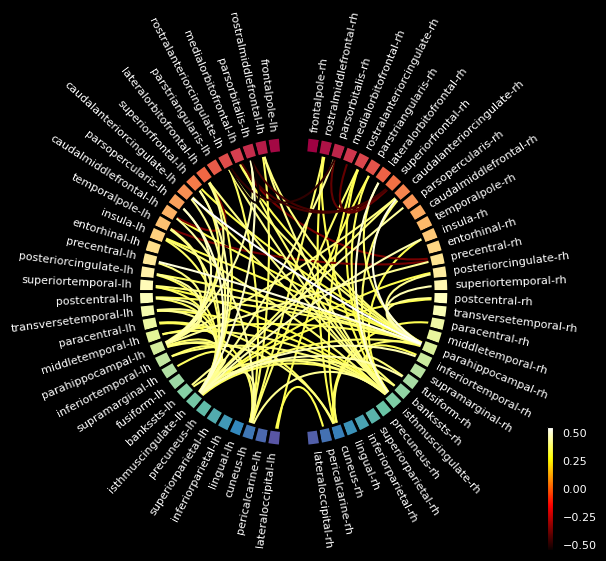

(<Figure size 800x800 with 2 Axes>, <PolarAxes: >)

In [40]:
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black', subplot_kw=dict(polar=True))

cohens_d = pd.read_csv(f'/Users/lina_01/Desktop/mpi_lemon/dynsys_cohens_d.csv')

plot_connectivity_circle(np.array(cohens_d),node_names=ordered_list,node_angles=node_angles, n_lines=100, ax=ax, colorbar=True)